In [2]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Logistic Regression
## Classification Using Linear Regression
Load your data.

In [3]:
from helpers import sample_data, load_data, standardize

# load data.
height, weight, gender = load_data()

# build sampled x and y.
seed = 1
y = np.expand_dims(gender, axis=1)
X = np.c_[height.reshape(-1), weight.reshape(-1)]
y, X = sample_data(y, X, seed, size_samples=200)
x, mean_x, std_x = standardize(X)

Use `least_squares` to compute w, and visualize the results.

LOSS  [[ 0.04396743]]


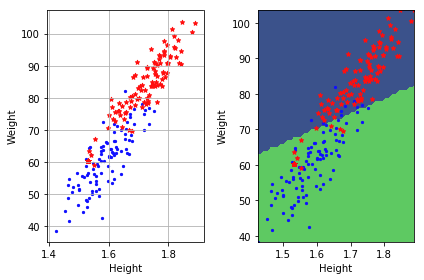

In [4]:
from least_squares import least_squares
from plots import visualization

def least_square_classification_demo(y, x):
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    mse, w = least_squares(y, tx)

    print("LOSS ", mse)
    visualization(y, x, mean_x, std_x, w, "classification_by_least_square")
    
least_square_classification_demo(y, x)

## Logistic Regression

Compute your cost by negative log likelihood.

In [5]:
def sigmoid(t):
    """apply sigmoid function on t."""
    etox = np.exp(t)
    return etox / (etox + 1)

In [6]:
def calculate_loss(y, tx, w):
    """compute the cost by negative log likelihood."""
    n = len(y)
    s = sigmoid(tx.dot(w))
    a = y * np.log(s)
    b = (np.ones(n) - y) * np.log(np.ones(n) - s)
    return -np.sum(a + b)

In [7]:
def calculate_gradient(y, tx, w):
    """compute the gradient of loss."""
    return np.transpose(tx).dot(sigmoid(tx.dot(w)) - y)

### Using Gradient Descent
Implement your function to calculate the gradient for logistic regression.

In [8]:
def learning_by_gradient_descent(y, tx, w, gamma):
    """
    Do one step of gradient descen using logistic regression.
    Return the loss and the updated w.
    """
    gradient = calculate_gradient(y, tx, w)
    loss = calculate_loss(y, tx, w)
    w = w - gamma * gradient
    return loss, w

Demo!

Current iteration=0, loss=27725.88722239781
Current iteration=100, loss=8692.806461125803
Current iteration=200, loss=8309.17856175188
Current iteration=300, loss=8219.727794732624
Current iteration=400, loss=8192.974127121119
Current iteration=500, loss=8184.017891742607
Current iteration=600, loss=8180.8374886379825
Current iteration=700, loss=8179.669989337991
Current iteration=800, loss=8179.232993219098
Current iteration=900, loss=8179.067506764219
Current iteration=1000, loss=8179.004392823801
Current iteration=1100, loss=8178.9802173711105
Current iteration=1200, loss=8178.970932282851
Current iteration=1300, loss=8178.967360248955
Current iteration=1400, loss=8178.9659846567165
Current iteration=1500, loss=8178.965454579101
Current iteration=1600, loss=8178.965250235906
Current iteration=1700, loss=8178.965171443022
Current iteration=1800, loss=8178.965141056591
Current iteration=1900, loss=8178.965129336977
Current iteration=2000, loss=8178.965124816625
Current iteration=2100,

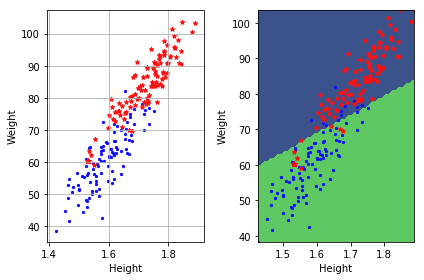

In [9]:
from helpers import de_standardize

def logistic_regression_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    threshold = 1e-8
    gamma = 0.01
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_gradient_descent(y, tx, w, gamma)
        # log info
        if iter % 100 == 0:
            print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_gradient_descent")
    print("loss={l}".format(l=calculate_loss(y, tx, w)))

logistic_regression_gradient_descent_demo(y, x)

Calculate your hessian below

In [10]:
def calculate_hessian(y, tx, w):
    """return the hessian of the loss function."""
    a = sigmoid(tx.dot(w)).flatten()
    s = np.diag(a*(np.ones(y.shape[0]) - a))
    return np.transpose(tx).dot(s).dot(tx)

Write a function below to return loss, gradient, and hessian.

In [11]:
def logistic_regression(y, tx, w):
    """return the loss, gradient, and hessian."""
    return calculate_loss(y, tx, w), calculate_gradient(y, tx, w), calculate_hessian(y, tx, w)

### Using Newton's method
Use Newton's method for logistic regression.

In [12]:
def learning_by_newton_method(y, tx, w):
    """
    Do one step on Newton's method.
    return the loss and updated w.
    """
    loss, gradient, hessian = logistic_regression(y, tx, w)
    
    gamma = 1
    A = np.linalg.solve(hessian, gradient)
    w = w - gamma * A
    return loss, w

demo

Current iteration=0, the loss=27725.88722239781
Current iteration=1, the loss=12682.31074781919
Current iteration=2, the loss=9460.91723987013
Current iteration=3, the loss=8399.493484496898
Current iteration=4, the loss=8191.279727447589
Current iteration=5, the loss=8179.0239872979155
Current iteration=6, the loss=8178.965123525416
Current iteration=7, the loss=8178.965121978117
Current iteration=8, the loss=8178.965121978118
loss=8178.965121978117


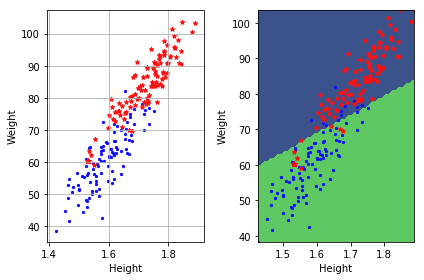

In [13]:
def logistic_regression_newton_method_demo(y, x):
    # init parameters
    max_iter = 100
    threshold = 1e-8
    lambda_ = 0.1
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_newton_method(y, tx, w)
        # log info
        if iter % 1 == 0:
            print("Current iteration={i}, the loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_newton_method")
    print("loss={l}".format(l=calculate_loss(y, tx, w)))

logistic_regression_newton_method_demo(y, x)

### Using penalized logistic regression
Fill in the function below.

In [14]:
def penalized_logistic_regression(y, tx, w, lambda_):
    """return the loss, gradient, and hessian."""
    loss = calculate_loss(y, tx, w) + (lambda_/2) * np.power(np.linalg.norm(w), 2)
    gradient = calculate_gradient(y, tx, w) + lambda_ * w
    a = np.eye(w.shape[0], dtype=float) * lambda_    
    hessian = calculate_hessian(y, tx, w) + a
    return loss, gradient, hessian

In [15]:
def learning_by_penalized_gradient(y, tx, w, gamma, lambda_):
    """
    Do one step of gradient descent, using the penalized logistic regression.
    Return the loss and updated w.
    """
    loss, gradient, hessian = penalized_logistic_regression(y, tx, w, lambda_)
    
    A = np.linalg.solve(hessian, gradient)
    w = w - gamma * A
    return loss, w

Current iteration=0, loss=27725.88722239781
Current iteration=1, loss=17834.17399963132
Current iteration=2, loss=13664.576009724702
Current iteration=3, loss=11261.102710103796
Current iteration=4, loss=9818.128274870625
Current iteration=5, loss=8980.322084641439
Current iteration=6, loss=8530.991512688115
Current iteration=7, loss=8315.98935401913
Current iteration=8, loss=8226.279543120732
Current iteration=9, loss=8193.765690320732
Current iteration=10, loss=8183.327336751629
Current iteration=11, loss=8180.244937394376
Current iteration=12, loss=8179.369469297128
Current iteration=13, loss=8179.119321388833
Current iteration=14, loss=8179.044179208425
Current iteration=15, loss=8179.0194990201235
Current iteration=16, loss=8179.01043458296
Current iteration=17, loss=8179.0067280213025
Current iteration=18, loss=8179.005082005599
Current iteration=19, loss=8179.004310920901
Current iteration=20, loss=8179.003938372729
Current iteration=21, loss=8179.003755348866
Current iteration=

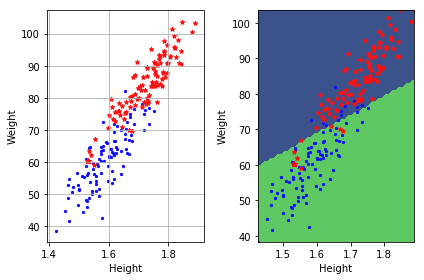

In [27]:
def logistic_regression_penalized_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 1000000000
    gamma = 0.5
    lambda_ = 0.001
    threshold = 1e-12
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_penalized_gradient(y, tx, w, gamma, lambda_)
        # log info
        if iter % 1 == 0:
            print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_penalized_gradient_descent")
    print("loss={l}".format(l=calculate_loss(y, tx, w)))
    
logistic_regression_penalized_gradient_descent_demo(y, x)